In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [45]:
import os, glob, shutil
import mahotas as mh

In [5]:
DATAFOLDER = '/raid/mpsych/GP2LUCCHI++/Lucchi++'

In [6]:
os.listdir(DATAFOLDER)

['.DS_Store', 'Test_Out', 'Train_In', 'Test_In', 'Train_Out']

In [29]:
train_image_dir = os.path.join(DATAFOLDER, 'Train_In')
test_image_dir = os.path.join(DATAFOLDER, 'Test_In')
train_mask_dir =  os.path.join(DATAFOLDER, 'Train_Out')
test_mask_dir = os.path.join(DATAFOLDER, 'Test_Out')

In [55]:
# for i in os.listdir(train_mask_dir):
#     old_name = os.path.join(train_mask_dir, i)
#     print(old_name)
#     new_name = os.path.join(train_mask_dir, i.split('.')[0].zfill(4)+'.png')
#     print(new_name)
#     shutil.move(old_name, new_name)
# for i in os.listdir(test_mask_dir):
#     old_name = os.path.join(test_mask_dir, i)
#     print(old_name)
#     new_name = os.path.join(test_mask_dir, i.split('.')[0].zfill(4)+'.png')
#     print(new_name)
#     shutil.move(old_name, new_name)

In [56]:
all_image_files = sorted(sorted(glob.glob(train_image_dir+'/*.png')) + sorted(glob.glob(test_image_dir+'/*.png')))
all_mask_files = sorted(sorted(glob.glob(train_mask_dir+'/*.png')) + sorted(glob.glob(test_mask_dir+'/*.png')))

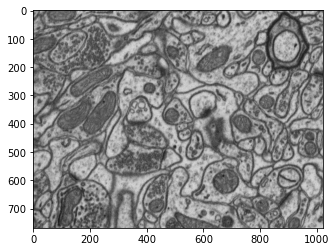

In [57]:
first_image = mh.imread(all_image_files[0])
imshow(first_image, cmap='gray')

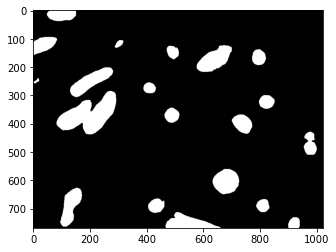

In [58]:
first_mask = mh.imread(all_mask_files[0])
imshow(first_mask, cmap='gray')

In [59]:
len(all_mask_files)

330

In [62]:
first_mask.shape

(768, 1024, 4)

In [63]:
images = np.zeros((660, 512, 512), dtype=np.uint8)

In [64]:
counter = 0
for a in all_image_files:
    img = mh.imread(a)
    
    # grab left image
    left = img[0:512,0:512]
    right = img[0:512,512:]
    
    images[counter] = left
    images[counter+1] = right
    
    counter += 2

In [79]:
masks = np.zeros((660, 512, 512), dtype=np.bool)

In [80]:
counter = 0
for a in all_mask_files:
    img = mh.imread(a)
    print(a)
    
    if img.ndim == 3:
        # grab left image
        left = img[0:512,0:512,0]
        right = img[0:512,512:,0]
    elif img.ndim == 2:
        left = img[0:512,0:512]
        right = img[0:512,512:]
    
    masks[counter] = left.astype(np.bool)
    masks[counter+1] = right.astype(np.bool)
    
    counter += 2

/raid/mpsych/GP2LUCCHI++/Lucchi++/Test_Out/0000.png
/raid/mpsych/GP2LUCCHI++/Lucchi++/Test_Out/0001.png
/raid/mpsych/GP2LUCCHI++/Lucchi++/Test_Out/0002.png
/raid/mpsych/GP2LUCCHI++/Lucchi++/Test_Out/0003.png
/raid/mpsych/GP2LUCCHI++/Lucchi++/Test_Out/0004.png
/raid/mpsych/GP2LUCCHI++/Lucchi++/Test_Out/0005.png
/raid/mpsych/GP2LUCCHI++/Lucchi++/Test_Out/0006.png
/raid/mpsych/GP2LUCCHI++/Lucchi++/Test_Out/0007.png
/raid/mpsych/GP2LUCCHI++/Lucchi++/Test_Out/0008.png
/raid/mpsych/GP2LUCCHI++/Lucchi++/Test_Out/0009.png
/raid/mpsych/GP2LUCCHI++/Lucchi++/Test_Out/0010.png
/raid/mpsych/GP2LUCCHI++/Lucchi++/Test_Out/0011.png
/raid/mpsych/GP2LUCCHI++/Lucchi++/Test_Out/0012.png
/raid/mpsych/GP2LUCCHI++/Lucchi++/Test_Out/0013.png
/raid/mpsych/GP2LUCCHI++/Lucchi++/Test_Out/0014.png
/raid/mpsych/GP2LUCCHI++/Lucchi++/Test_Out/0015.png
/raid/mpsych/GP2LUCCHI++/Lucchi++/Test_Out/0016.png
/raid/mpsych/GP2LUCCHI++/Lucchi++/Test_Out/0017.png
/raid/mpsych/GP2LUCCHI++/Lucchi++/Test_Out/0018.png
/raid/mpsych

/raid/mpsych/GP2LUCCHI++/Lucchi++/Train_Out/0027.png
/raid/mpsych/GP2LUCCHI++/Lucchi++/Train_Out/0028.png
/raid/mpsych/GP2LUCCHI++/Lucchi++/Train_Out/0029.png
/raid/mpsych/GP2LUCCHI++/Lucchi++/Train_Out/0030.png
/raid/mpsych/GP2LUCCHI++/Lucchi++/Train_Out/0031.png
/raid/mpsych/GP2LUCCHI++/Lucchi++/Train_Out/0032.png
/raid/mpsych/GP2LUCCHI++/Lucchi++/Train_Out/0033.png
/raid/mpsych/GP2LUCCHI++/Lucchi++/Train_Out/0034.png
/raid/mpsych/GP2LUCCHI++/Lucchi++/Train_Out/0035.png
/raid/mpsych/GP2LUCCHI++/Lucchi++/Train_Out/0036.png
/raid/mpsych/GP2LUCCHI++/Lucchi++/Train_Out/0037.png
/raid/mpsych/GP2LUCCHI++/Lucchi++/Train_Out/0038.png
/raid/mpsych/GP2LUCCHI++/Lucchi++/Train_Out/0039.png
/raid/mpsych/GP2LUCCHI++/Lucchi++/Train_Out/0040.png
/raid/mpsych/GP2LUCCHI++/Lucchi++/Train_Out/0041.png
/raid/mpsych/GP2LUCCHI++/Lucchi++/Train_Out/0042.png
/raid/mpsych/GP2LUCCHI++/Lucchi++/Train_Out/0043.png
/raid/mpsych/GP2LUCCHI++/Lucchi++/Train_Out/0044.png
/raid/mpsych/GP2LUCCHI++/Lucchi++/Train_Out/00

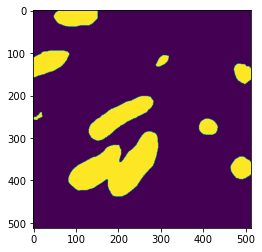

In [82]:
imshow(masks[0])

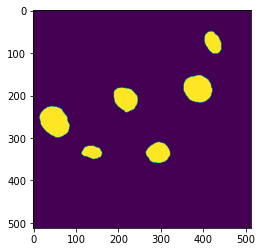

In [84]:
imshow(masks[-1])

In [91]:
images2 = np.expand_dims(images, axis=-1)

In [92]:
images2.shape

(660, 512, 512, 1)

In [94]:
masks2 = np.expand_dims(masks, axis=-1)

In [95]:
masks2.shape

(660, 512, 512, 1)

In [93]:
np.save('/raid/mpsych/gp2_lucchi_images.npy', images2)

In [96]:
np.save('/raid/mpsych/gp2_lucchi_masks.npy', masks2)